## Part 1: Exploring the data

In [1]:
# import the packages we've been using all semester long
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We'll be working with a dataset on course enrollments from 2000 to 2023 for a subset of Whitman majors

# First, import the data file as a data frame
df_courses = pd.read_excel("whitman-course-sizes-2000-2023.xlsx")

**Your task:**

Examine it. Ask yourself: What does each row represent? Then, figure out: 

In [5]:
df_courses.head()

,Term,Name,Short Title,Subject,Min Cred,Max Cred,Capacity,Active Students Count
0,2000FA,CHEM-125-A,General Chemistry,CHEM,3.0,NaN,45.0,37
1,2000FA,CHEM-125-B,General Chemistry,CHEM,3.0,NaN,45.0,31
2,2000FA,CHEM-125-C,General Chemistry,CHEM,3.0,NaN,45.0,43
3,2000FA,CHEM-125-D,General Chemistry,CHEM,3.0,NaN,45.0,34
4,2000FA,CHEM-135-S,General Chemistry Lab I,CHEM,1.0,NaN,16.0,16


In [6]:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7286 entries, 0 to 7285
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Term                   7286 non-null   object 
 1   Name                   7286 non-null   object 
 2   Short Title            7286 non-null   object 
 3   Subject                7286 non-null   object 
 4   Min Cred               7286 non-null   float64
 5   Max Cred               1400 non-null   float64
 6   Capacity               7274 non-null   float64
 7   Active Students Count  7286 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 455.5+ KB


In [7]:
# How many different majors are there in this data set and which are they?
df_courses["Subject"].unique()

array(['CHEM', 'ECON', 'ENGL', 'JPNS', 'MATH', 'PHIL', 'PSYC', 'CS'],
      dtype=object)

In [8]:
# What time period does this data frame cover?
df_courses["Term"].unique()

array(['2000FA', '2001SP', '2001FA', '2002SP', '2002FA', '2003SP',
       '2003FA', '2004SP', '2004FA', '2005SP', '2005FA', '2006SP',
       '2006FA', '2007SP', '2007FA', '2008SP', '2008FA', '2009SP',
       '2009FA', '2010SP', '2010FA', '2011SP', '2011FA', '2012SP',
       '2012FA', '2013SP', '2013FA', '2014SP', '2014FA', '2015SP',
       '2015FA', '2016SP', '2016FA', '2017SP', '2017FA', '2018SP',
       '2018FA', '2019SP', '2019FA', '2020SP', '2020FA', '2021SP',
       '2021FA', '2022SP', '2022FA', '2023SP'], dtype=object)

In [9]:
# How many *unique* courses are there?
len(df_courses["Short Title"].unique())

986

In [10]:
# How many course instances (rows) are there for each major?
df_courses["Subject"].value_counts()

CHEM    1823
ENGL    1251
MATH    1084
PSYC    1049
ECON     832
PHIL     763
JPNS     283
CS       201
Name: Subject, dtype: int64

Ok, now that we have that down, let's do some more complex warm-up questions:

In [11]:
# Last semester (Fall 2022), how many courses were there taught in each Subject/Major?

df_2022 = df_courses[df_courses["Term"] == "2022FA"]

df_2022.groupby("Subject")["Short Title"].count()

Subject
CHEM    43
CS      14
ECON    16
ENGL    19
JPNS     9
MATH    25
PHIL    15
PSYC    18
Name: Short Title, dtype: int64

In [12]:
df_2022

,Term,Name,Short Title,Subject,Min Cred,Max Cred,Capacity,Active Students Count
6949,2022FA,CHEM-100-A,Intro to Env Chem & Science,CHEM,3.0,NaN,35.0,38
6950,2022FA,CHEM-111-A,Problem-Solving in Chemistry,CHEM,1.0,NaN,40.0,22
6951,2022FA,CHEM-125-A,General Chemistry I,CHEM,3.0,NaN,36.0,35
6952,2022FA,CHEM-125-B,General Chemistry I,CHEM,3.0,NaN,36.0,39
6953,2022FA,CHEM-125-C,General Chemistry I,CHEM,3.0,NaN,36.0,37
...,...,...,...,...,...,...,...,...
7103,2022FA,PSYC-420-A,Contemporary and Hist Issues,PSYC,4.0,NaN,20.0,18
7104,2022FA,PSYC-420-B,Contemporary and Hist Issues,PSYC,4.0,NaN,20.0,20
7105,2022FA,PSYC-420-C,Contemporary and Hist Issues,PSYC,4.0,NaN,17.0,18
7106,2022FA,PSYC-495-A,Thesis,PSYC,3.0,NaN,65.0,48


In [ ]:
# Last semester (Fall 2022), what was the largest course?

In [13]:
df_2022[df_2022["Active Students Count"] == df_2022["Active Students Count"].max()]

,Term,Name,Short Title,Subject,Min Cred,Max Cred,Capacity,Active Students Count
7106,2022FA,PSYC-495-A,Thesis,PSYC,3.0,NaN,65.0,48


In [14]:
# Last semester (Fall 2022), which of the  majors in this dataset had the highest and the lowest average class size?
df_2022.groupby("Subject")["Active Students Count"].mean()

Subject
CHEM    13.348837
CS      14.714286
ECON    18.250000
ENGL    12.736842
JPNS     6.000000
MATH    13.800000
PHIL    11.066667
PSYC    26.055556
Name: Active Students Count, dtype: float64

In [15]:
# Last semester (Fall 2022), pick a Subject/Major and determine what percent of classes had fewer than 20 students
df_2022_CS = df_2022[df_2022["Subject"] == "CS"]
df_2022_CS

,Term,Name,Short Title,Subject,Min Cred,Max Cred,Capacity,Active Students Count
6992,2022FA,CS-167-A,Computational Prob Solvng,CS,4.0,NaN,30.0,27
6993,2022FA,CS-167-B,Computational Prob Solvng,CS,4.0,NaN,30.0,29
6994,2022FA,CS-215-A,Intro to Data Science,CS,4.0,NaN,24.0,12
6995,2022FA,CS-220-A,Discrete Math & Func Prog,CS,3.0,NaN,24.0,31
6996,2022FA,CS-270-A,Data Structures,CS,4.0,NaN,24.0,20
6997,2022FA,CS-270-B,Data Structures,CS,4.0,NaN,16.0,8
6998,2022FA,CS-310-A,Computer Systems Programming,CS,4.0,NaN,20.0,21
6999,2022FA,CS-320-A,Theory of Computation,CS,3.0,NaN,20.0,16
7000,2022FA,CS-360-A,Interactive Computer Graphics,CS,3.0,NaN,24.0,21
7001,2022FA,CS-481-A,Independent Study,CS,1.0,4.0,30.0,1


In [16]:
len(df_2022_CS[df_2022_CS["Active Students Count"] < 20]) / len(df_2022_CS)

0.5714285714285714

In [ ]:
# CHALLENGE: Write a function that takes in a list of courses (i.e. ["CS-270-A", "CS-310-A", "CHEM-125-A"])
# and returns the mean experienced class size for a student in those classes

In [17]:
# Note: This won't account for variations of courses (i.e. "CS-270-B" versus "CS-270-A")
# That's a more complicated problem...
# But, it does let you do a simple estimate of what YOUR mean expected class size
# might be for, say, next year
def mean_exp_class_size(course_list, dataframe):
    course_sizes = []
    for course in course_list:
        avg_size = dataframe[dataframe["Name"] == course]["Active Students Count"].mean()
        course_sizes.append(avg_size)
    print("mean experienced class size: " + str(np.mean(course_sizes)))
    print("mean courses sizes: ")
    print(course_sizes)

In [18]:
mean_exp_class_size(["CS-270-B", "CS-310-A", "CHEM-125-A"], df_2022)

mean experienced class size: 21.333333333333332
mean courses sizes: 
[8.0, 21.0, 35.0]


## Part 2: Visualizing the data

Now, this is fun... but we can also use VISUALIZATIONS to explore the data.

First, let's consider the *distributions* of the course sizes.

How might we use visualizations to examine each Subject/Major?

We could start by making a histogram for each one...

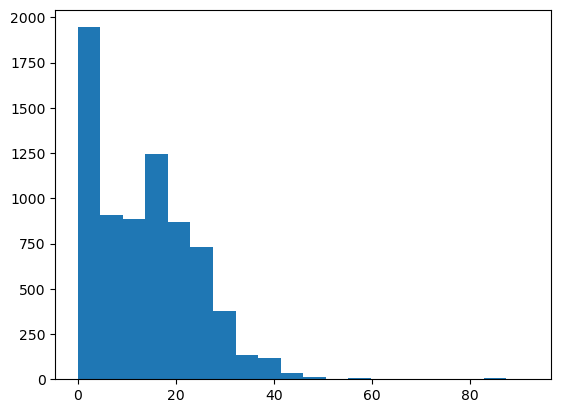

In [20]:
# Make a histogram of the course sizes (for all subjects, all years together)
# What do you notice?

plt.hist(df_courses["Active Students Count"], bins=20)
plt.show()

In [ ]:
# There are lots of courses with no students! Let's check that out...

In [21]:
# Show the 0 student courses
df_courses[df_courses["Active Students Count"] == 0]

,Term,Name,Short Title,Subject,Min Cred,Max Cred,Capacity,Active Students Count
23,2000FA,CHEM-481-A,Adv Topics in Chemistry,CHEM,3.0,NaN,10.0,0
25,2000FA,CHEM-490-B,Research,CHEM,1.0,3.0,10.0,0
27,2000FA,CHEM-490-D,Research,CHEM,1.0,3.0,10.0,0
29,2000FA,CHEM-490-F,Research,CHEM,1.0,3.0,10.0,0
30,2000FA,CHEM-498-A,Honors Thesis,CHEM,3.0,NaN,10.0,0
...,...,...,...,...,...,...,...,...
7255,2023SP,PHIL-484-B,Independent Study,PHIL,1.0,4.0,10.0,0
7277,2023SP,PSYC-408-B,Independent Study,PSYC,1.0,3.0,20.0,0
7278,2023SP,PSYC-408-C,Independent Study,PSYC,1.0,3.0,20.0,0
7279,2023SP,PSYC-408-D,Independent Study,PSYC,1.0,3.0,20.0,0


In [22]:
# And the 1-student courses
df_courses[df_courses["Active Students Count"] == 1]

,Term,Name,Short Title,Subject,Min Cred,Max Cred,Capacity,Active Students Count
21,2000FA,CHEM-451-A,Independent Study,CHEM,1.0,3.0,10.0,1
24,2000FA,CHEM-490-A,Research,CHEM,1.0,3.0,10.0,1
26,2000FA,CHEM-490-C,Research,CHEM,1.0,3.0,10.0,1
28,2000FA,CHEM-490-E,Research,CHEM,1.0,3.0,10.0,1
47,2000FA,ECON-493-B,Directed Reading,ECON,2.0,4.0,1.0,1
...,...,...,...,...,...,...,...,...
7256,2023SP,PHIL-484-C,Independent Study,PHIL,1.0,4.0,10.0,1
7257,2023SP,PHIL-484-D,Independent Study,PHIL,1.0,4.0,10.0,1
7280,2023SP,PSYC-408-E,Independent Study,PSYC,1.0,3.0,20.0,1
7282,2023SP,PSYC-408-H,Independent Study,PSYC,1.0,3.0,20.0,1


In [23]:
df_courses[df_courses["Active Students Count"] == 1]["Short Title"].value_counts()

Independent Study                 331
Honors Thesis                     117
Research                           68
Student Research                   58
Directed Reading                   37
Thesis                             29
Senior Thesis                      21
Research Experience                14
Senior Paper                        5
Principles of Economics             4
Tutorial in Symbolic Logic          4
Adv Topics in Chemistry             3
Tutorial: Statistical Methods       2
Theory of Computation               2
Practicum in Psychology             2
Dram Lit:Medieval Thru 18th C       2
Tutorial: History of Psych          2
Honors Project                      2
Senior Project                      2
Mathematical Economics              2
Independent Study in Geometry       2
Intermediate Japanese               2
Abstract Algebra                    1
Drama Lit: 19th Century to Now      1
Env Chem                            1
Capstone Project II                 1
Math Modelin

In [24]:
# So let's drop any course that only has 0 or 1 student in it
# If we were doing this more thoroughly, we might want to drop even more
# because some "Independent Study" courses, for example, have 2 students
df_courses = df_courses[df_courses["Active Students Count"] > 1]


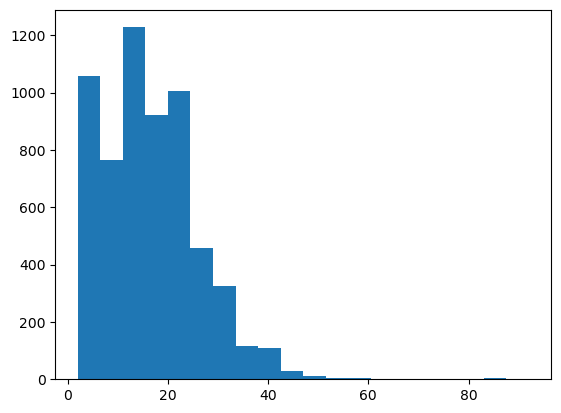

In [25]:
# Now redraw the histogram -- how is it different?

plt.hist(df_courses["Active Students Count"], bins=20)
plt.show()

In [ ]:
# Pick any Subject/Major you like
# Make a histogram of the class sizes for that Major

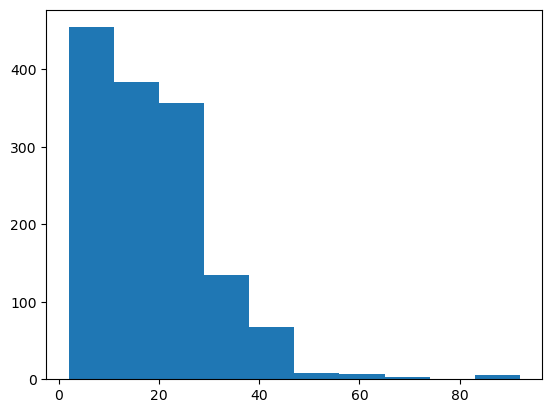

In [26]:
# Histogram for chemistry
plt.hist(df_courses[df_courses["Subject"]=="CHEM"]["Active Students Count"])
plt.show()

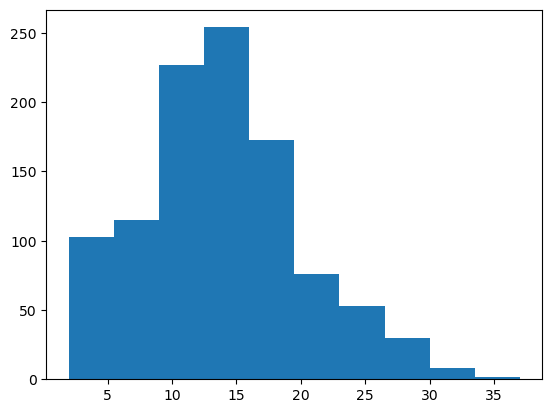

In [27]:
# Histogram for English
plt.hist(df_courses[df_courses["Subject"]=="ENGL"]["Active Students Count"])
plt.show()

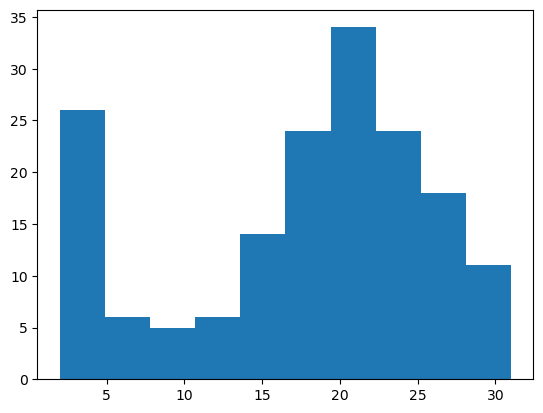

In [28]:
# Histogram for CS
plt.hist(df_courses[df_courses["Subject"]=="CS"]["Active Students Count"])
plt.show()

Or, we could put multiple majors on one histogram.

Let's try that out...

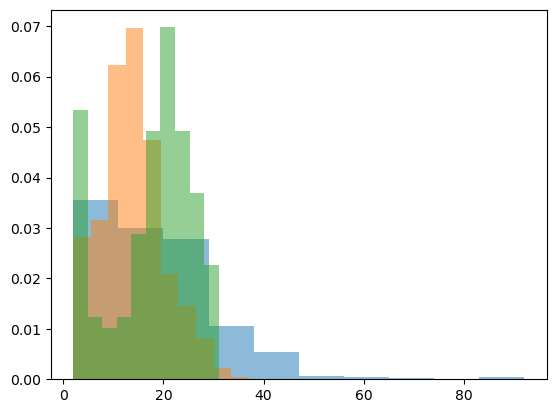

In [29]:
# Histogram for Chemistry, English, and CS

plt.hist(df_courses[df_courses["Subject"]=="CHEM"]["Active Students Count"], density=True, alpha=0.5)
plt.hist(df_courses[df_courses["Subject"]=="ENGL"]["Active Students Count"], density=True, alpha=0.5)
plt.hist(df_courses[df_courses["Subject"]=="CS"]["Active Students Count"], density=True, alpha=0.5)

plt.show()

## Part 3: Introducing Seaborn

Ok, we are getting closer... But is there a better way? Let's try some of the plots we can make with Seaborn.

__What is Seaborn?__

Seaborn is a visualization package that runs on top of Matplotlib. It is specially designed for statistical analysis and for exploring distributions in data. You can find out more at: https://seaborn.pydata.org/. A great place to start is the [Seaborn Tutorial](https://seaborn.pydata.org/tutorial/introduction.html).

__Installation__

Depending on your Anaconda installation, you may need to install the package. 

First, try running the import code block below. If it works, great! 

If it doesn't work, open up a terminal and run this to install:

    conda install seaborn



In [30]:
# import Seaborn
import seaborn as sns

The next part is new, so follow along as best you can.

You don't need to know everything (I certainly don't!). Just get comfortable trying to figure our how these plots work by consulting the [Seaborn documentation](https://seaborn.pydata.org/tutorial.html) and looking for examples that help you understand.

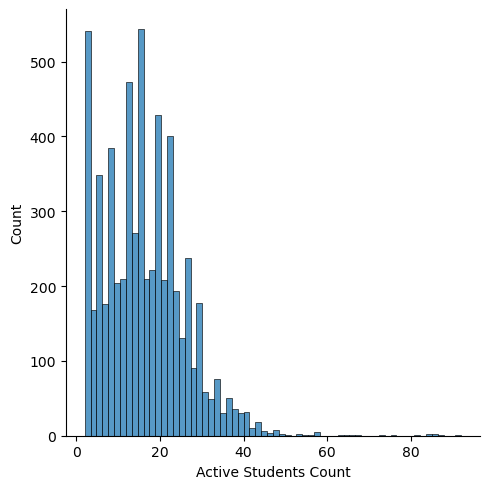

In [31]:
# We can use a seaborn .displot()
# It's basically the same as a matplotlib histogram
# We can put all of the Subjects/Majors on one plot:

sns.displot(df_courses, x="Active Students Count")

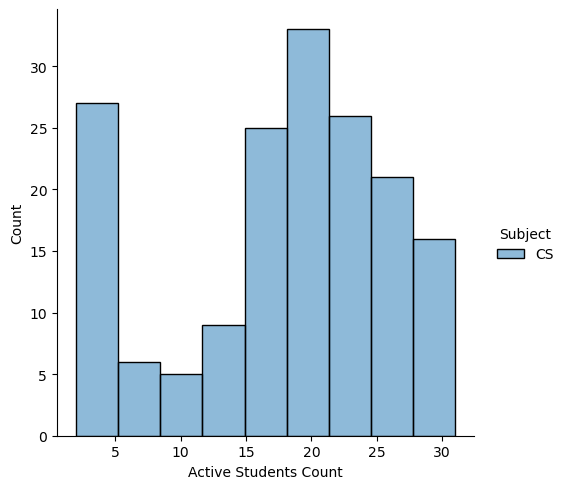

In [32]:
# Or we could show just one major

sns.displot(df_courses[df_courses["Subject"] == "CS"], x="Active Students Count", hue="Subject")

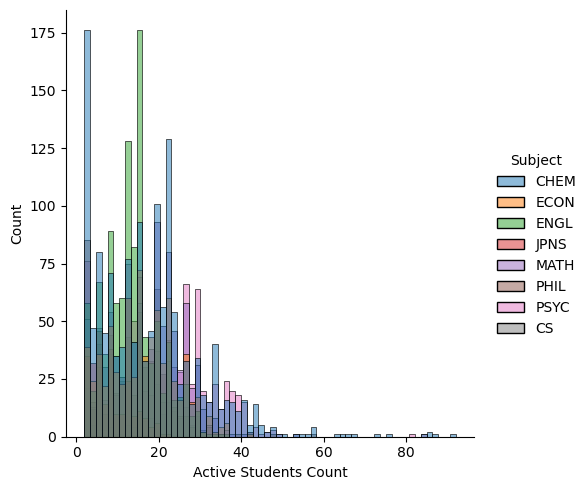

In [33]:
# Or we could show them all...
# But this is messy (although note how easy it is to make!)

sns.displot(df_courses, x="Active Students Count", hue="Subject")

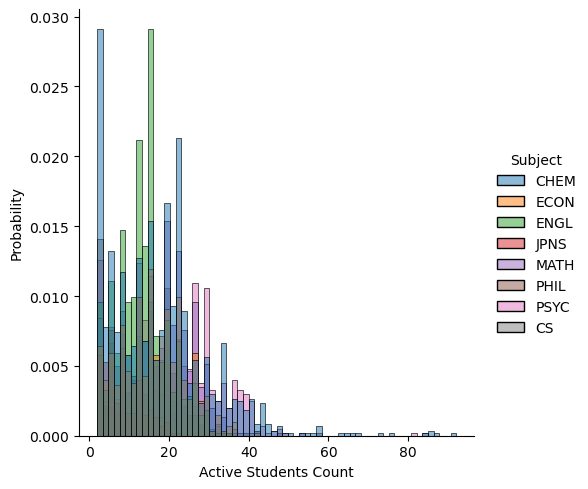

In [34]:
# And here we are normalizing:

sns.displot(df_courses, x="Active Students Count", hue="Subject", stat="probability")

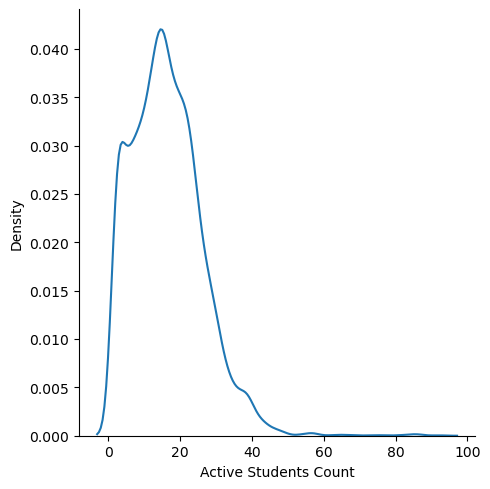

In [35]:
# We can also make a continuous plot
# This is using "kernel density estimation" to smooth out the histogram
# More at: https://en.wikipedia.org/wiki/Kernel_density_estimation

sns.displot(df_courses, x="Active Students Count", kind="kde")

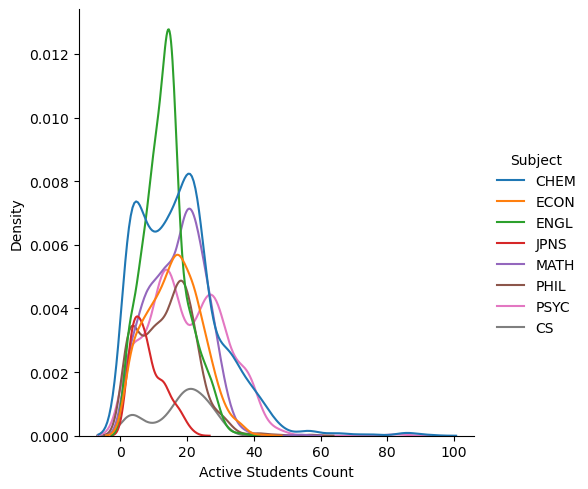

In [36]:
# Maybe it will be easier to see all of the courses if we use our smooth kernel density (kde) plot

sns.displot(df_courses, x="Active Students Count", kind="kde", hue="Subject")

To really up our game, let's visualize the Subjects/Majors separately.

To do this, let's play with a **catplot** -- which stands for categorical plot. This is useful for dealing with categorical data, like the different Subjects and Courses that we have in this data set. For more on catplot, check out: https://seaborn.pydata.org/generated/seaborn.catplot.html

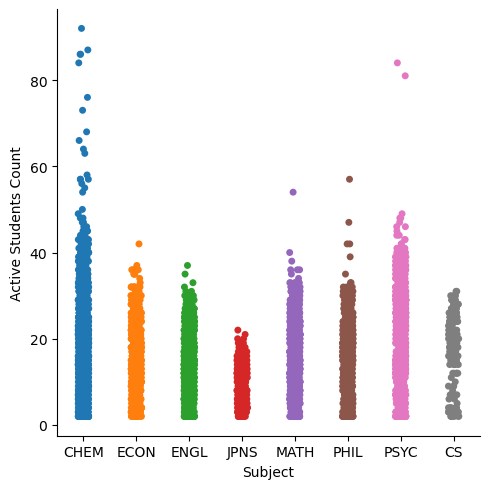

In [37]:
# A basic catplot showing the distributions...
# Notice how every course (row) becomes a dot

sns.catplot(data=df_courses, x="Subject", y="Active Students Count")

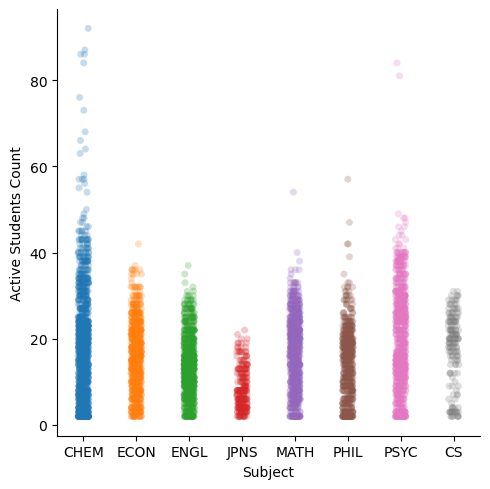

In [38]:
# Ok, that is a good start... let's try adding a jitter and making it transparent

sns.catplot(data=df_courses, x="Subject", y="Active Students Count", alpha=0.25, jitter=True)

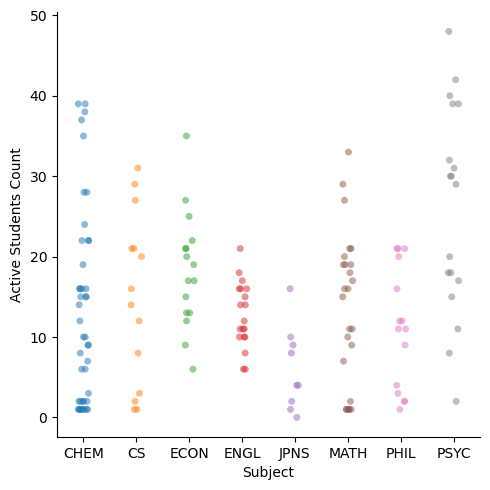

In [39]:
# This is a little messy, so let's try it with just the courses last semester

sns.catplot(data=df_2022, x="Subject", y="Active Students Count", alpha=0.5)

<AxesSubplot:xlabel='Subject', ylabel='Active Students Count'>

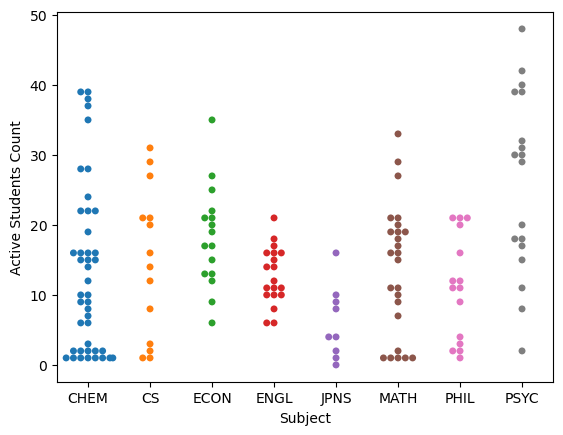

In [40]:
# With this smaller dataset, we can also try a swarmplot
# Notice the difference?

sns.swarmplot(data=df_2022, x="Subject", y="Active Students Count")

How else might we visualize distributions? We could do a box plot, also known as a box and whiskers plot. ([This post](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review) has a nice refresher on how box plots work.)

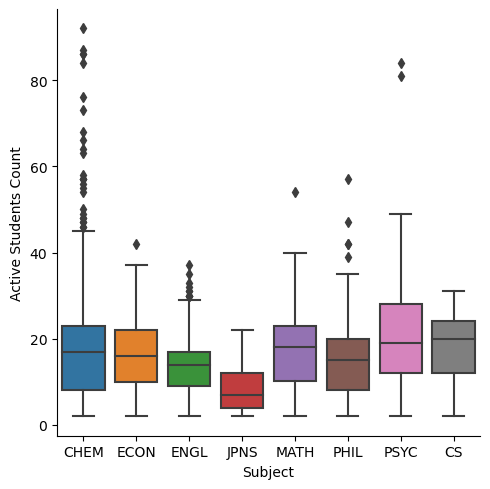

In [41]:
# We can change kind to "box"
sns.catplot(data=df_courses, x="Subject", y="Active Students Count", kind="box")

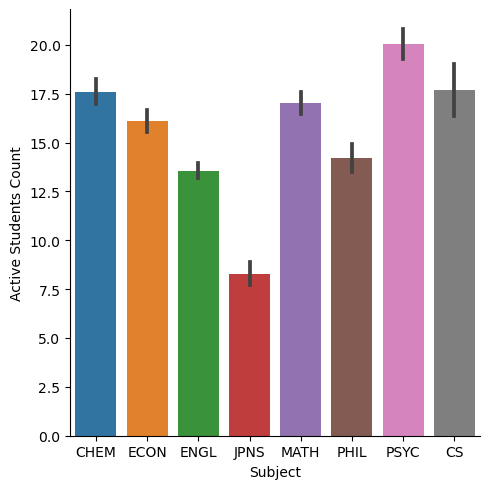

In [42]:
# Or we could do a bar plot with errors
sns.catplot(data=df_courses, x="Subject", y="Active Students Count", kind="bar")

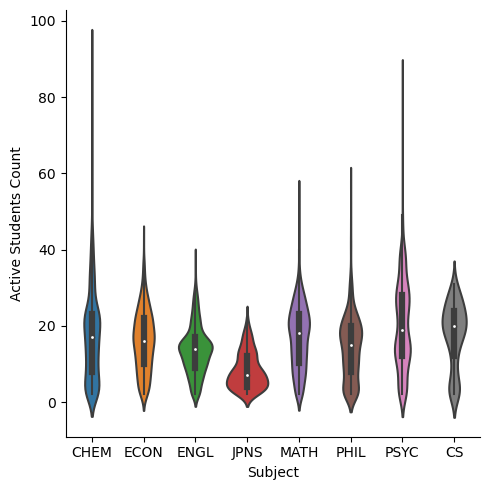

In [43]:
# Or a violin plot (which is kind of like a box plot, but continuous)
sns.catplot(data=df_courses, x="Subject", y="Active Students Count", kind="violin")

Notice how the different plots emphasize different features of the distributions. 

For example, the violin emphasizes many of the courses seems to have "lumps" --- these might be common course caps (12, 25, etc.).

And the bar chart really emphasizes the means.

What do the other visualizations empahsize?

In [ ]:
# What are some other ways we can explore distributions?

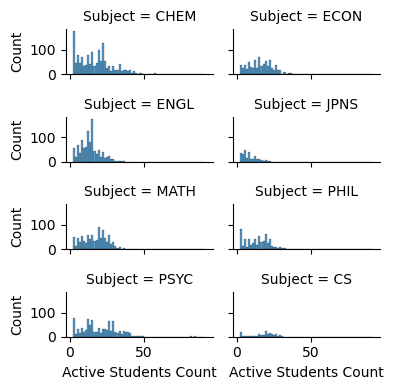

In [45]:
# We could also make a grid of histograms

sns.displot(df_courses, x="Active Students Count", col="Subject", col_wrap=2, height=1, aspect=2)

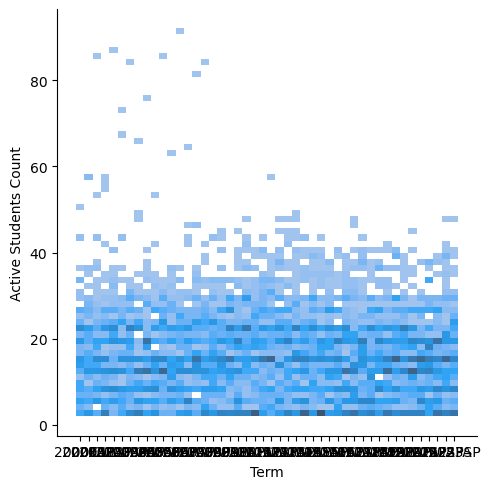

In [46]:
# We can also look at a BIVARIATE DISTRIBUTION...
# That is, distribution according to two different variables at once

# Let's look at the distribution of class size by term (semester) 

sns.displot(df_courses, y="Active Students Count", x="Term")

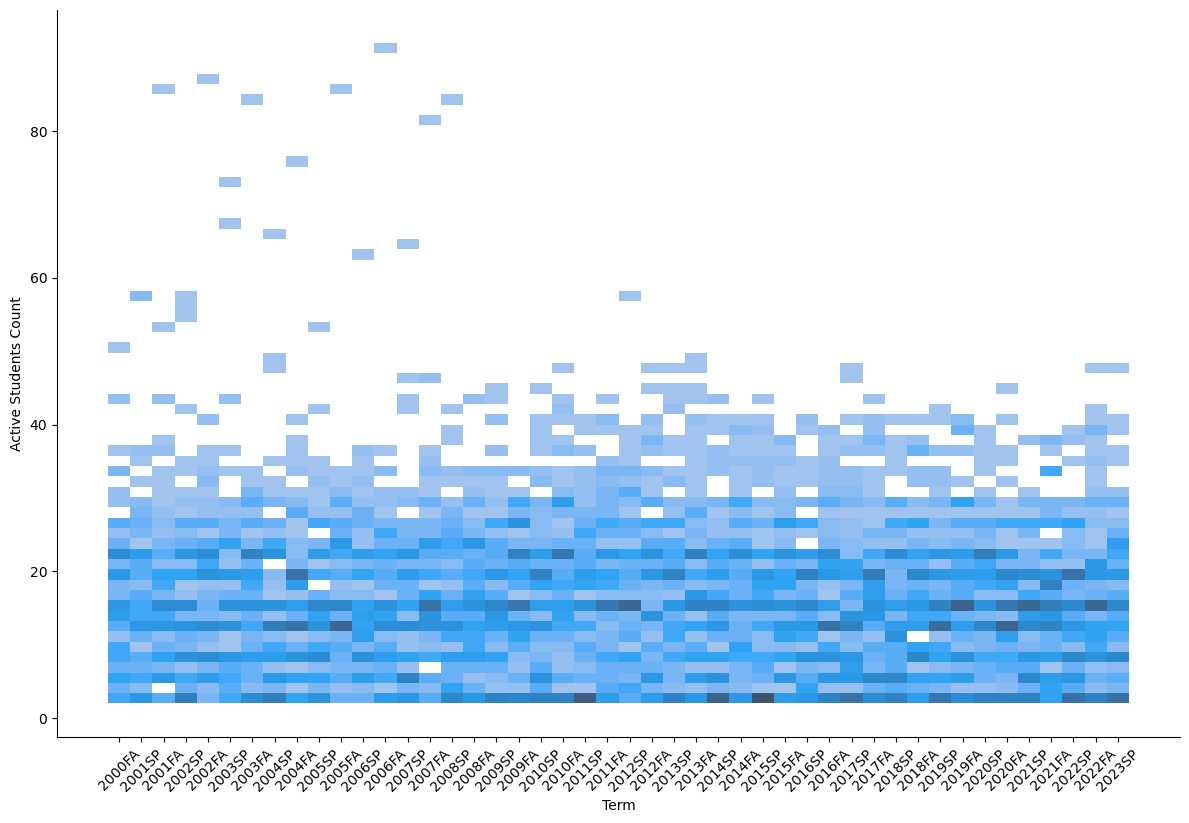

In [47]:
# Oof, that's really ugly! Let's set the figure size
my_plot = sns.displot(df_courses, y="Active Students Count", x="Term", height=8, aspect=1.5)
# And rotate the x-axes labels
plt.xticks(rotation=45)
plt.show()

# I'm showing you this not because you need to know this, but because these are the things that
# Will come up as you work on making plots :P

## Part 4: Time series
These plots aren't really great for looking at trends over time. Right now, "Term" is categorical. Can we turn it into a date-time object?

In [ ]:
# Add three new columns into your data frame:
# Year
# Month
# Day

# For our purposes, you can assume that the Fall semester starts on August 1 
# and the Spring semester stats on January 1


In [ ]:
# To make the year
df_courses["Year"] = df_courses["Term"].str[:4]

In [ ]:
# To do the month, we'll write a simple function
def determine_month(x):
    month = x[-2:]
    if month == "FA":
        return(8)
    if month == "SP":
        return(1)
    else:
        return null
    

In [ ]:
# Then use .apply
df_courses["Month"] = df_courses["Term"].apply(determine_month)

In [ ]:
# And they all just have a value of 1 for the day
df_courses["Day"] = 1

In [ ]:
# Now, use pd.to_datetime to make a new column, "Date", that is a datetime object
# using the "Day" "Month" and "Year" info
# Remember pd.to_datetime: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [ ]:
# Now, use pd.to_datetime to make a new column, "Date", that is a datetime object
df_courses["Date"] = pd.to_datetime(df_courses[["Day","Month","Year"]])

In [ ]:
df_courses

In [ ]:
# Let's make a bar chart showing the average class size over time

fig, axs = plt.subplots(figsize=(10, 4))

df_courses.groupby(df_courses["Date"])["Active Students Count"].mean().plot(kind='bar', rot=90, ax=axs)


plt.xlabel("Semester")  # custom x label using Matplotlib

plt.ylabel("Average Class Size") # custom y label using Matplotlib

In [ ]:
# Or we could do a line
fig, axs = plt.subplots(figsize=(20, 4))

df_courses.groupby(df_courses["Date"])["Active Students Count"].mean().plot(kind='line', rot=90, ax=axs)


plt.xlabel("Semester")  # custom x label using Matplotlib

plt.ylabel("Average Class Size")

In [ ]:
# What about plotting the **distribution** over time?
# This is what Seaborn does well!

sns.lineplot(x="Date", y="Active Students Count", data=df_courses)

In [ ]:
# We can also look at the different Subjects/Majors

sns.lineplot(x="Date", y="Active Students Count", hue="Subject", data=df_courses)

In [ ]:
# Wow, that's messy! Let's clean it up
# We can put the plots onto a grid
# To do this, we use .relplot()

g = sns.relplot(
    data=df_courses,
    x="Date", y="Active Students Count", col="Subject", hue="Subject",
    kind="line", col_wrap=2, height=2, aspect=1.5, legend=False,)

In [ ]:
# What if we just want to look at the past 5 years?
# Now that we have a datetime object, we can use a Boolean selector!

#recent_classes = df_courses[df_courses["Date"] >= "01-01-2018"]

g = sns.relplot(
    data=recent_classes,
    x="Date", y="Active Students Count", col="Subject", hue="Subject",
    kind="line", col_wrap=2, height=2, aspect=1.5, legend=False,)

In [ ]:
# CHALLENGE: What else can you do with this data?

# You might try...
# A: Coming up with an interesting question and answering it
# B: Making a useful function (i.e. our mean expereinced class size estimator)
# C: Making an exploratory visualiation

# What else might you want to do?